In [1]:
library(ISLR)
library(repr)
library(MASS)                # For lda, qda model
library(class)               # For knn model 
options(repr.plot.width = 4, repr.plot.height = 3, repr.plot.res = 100)

In [2]:
# Dataset: Smarket, which records percentage returns for the S&P 500 stock index over 1250 days (2001 - 2005)
## For each date, we have ...
## Percentage returns for each of the five previous trading days (Lag1 - Lag5)
## Volume (The number of shares traded on the previous day, in billions)
## Today (The percentage return on the date in question) 
## Direction (Whether the market was up or down on the date in question)
names(Smarket)        # View variable names 
dim(Smarket)          # View data dimensions
summary(Smarket)      # View basic info 

[1] "Year"      "Lag1"      "Lag2"      "Lag3"      "Lag4"      "Lag5"     
[7] "Volume"    "Today"     "Direction"

[1] 1250    9

      Year           Lag1                Lag2                Lag3          
 Min.   :2001   Min.   :-4.922000   Min.   :-4.922000   Min.   :-4.922000  
 1st Qu.:2002   1st Qu.:-0.639500   1st Qu.:-0.639500   1st Qu.:-0.640000  
 Median :2003   Median : 0.039000   Median : 0.039000   Median : 0.038500  
 Mean   :2003   Mean   : 0.003834   Mean   : 0.003919   Mean   : 0.001716  
 3rd Qu.:2004   3rd Qu.: 0.596750   3rd Qu.: 0.596750   3rd Qu.: 0.596750  
 Max.   :2005   Max.   : 5.733000   Max.   : 5.733000   Max.   : 5.733000  
      Lag4                Lag5              Volume           Today          
 Min.   :-4.922000   Min.   :-4.92200   Min.   :0.3561   Min.   :-4.922000  
 1st Qu.:-0.640000   1st Qu.:-0.64000   1st Qu.:1.2574   1st Qu.:-0.639500  
 Median : 0.038500   Median : 0.03850   Median :1.4229   Median : 0.038500  
 Mean   : 0.001636   Mean   : 0.00561   Mean   :1.4783   Mean   : 0.003138  
 3rd Qu.: 0.596750   3rd Qu.: 0.59700   3rd Qu.:1.6417   3rd Qu.: 0.596750  
 Max. 

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today
Year,1.00000000,0.029699649,0.030596422,0.033194581,0.035688718,0.029787995,0.53900647,0.030095229
Lag1,0.02969965,1.000000000,-0.026294328,-0.010803402,-0.002985911,-0.005674606,0.04090991,-0.026155045
Lag2,0.03059642,-0.026294328,1.000000000,-0.025896670,-0.010853533,-0.003557949,-0.04338321,-0.010250033
Lag3,0.03319458,-0.010803402,-0.025896670,1.000000000,-0.024051036,-0.018808338,-0.04182369,-0.002447647
Lag4,0.03568872,-0.002985911,-0.010853533,-0.024051036,1.000000000,-0.027083641,-0.04841425,-0.006899527
Lag5,0.02978799,-0.005674606,-0.003557949,-0.018808338,-0.027083641,1.000000000,-0.02200231,-0.034860083
Volume,0.53900647,0.040909908,-0.043383215,-0.041823686,-0.048414246,-0.022002315,1.00000000,0.014591823
Today,0.03009523,-0.026155045,-0.010250033,-0.002447647,-0.006899527,-0.034860083,0.01459182,1.000000000


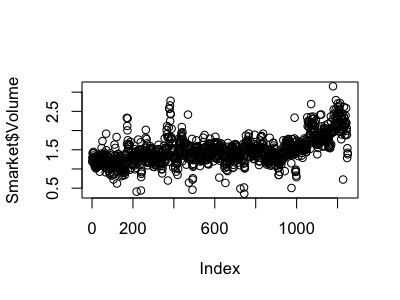

In [3]:
cor(Smarket[, -9])    # View pairwise correlations (Excluding categorical variable) 
plot(Smarket$Volume)  # Show increasing trend of average number of shares traded 

In [4]:
# Logistic regression: Direction ~ Lag1 + ... + Lag5 + Volume
# Model: Generalized linear models, a class of models that includes logistic regression
# Interpretation: Negative association between yesterday's return and today's return  
glm_model_1 = glm(Direction ~ Lag1 + Lag2 + Lag3 + Lag4 + Lag5 + Volume, data = Smarket, family = binomial)
summary(glm_model_1)


Call:
glm(formula = Direction ~ Lag1 + Lag2 + Lag3 + Lag4 + Lag5 + 
    Volume, family = binomial, data = Smarket)

Deviance Residuals: 
   Min      1Q  Median      3Q     Max  
-1.446  -1.203   1.065   1.145   1.326  

Coefficients:
             Estimate Std. Error z value Pr(>|z|)
(Intercept) -0.126000   0.240736  -0.523    0.601
Lag1        -0.073074   0.050167  -1.457    0.145
Lag2        -0.042301   0.050086  -0.845    0.398
Lag3         0.011085   0.049939   0.222    0.824
Lag4         0.009359   0.049974   0.187    0.851
Lag5         0.010313   0.049511   0.208    0.835
Volume       0.135441   0.158360   0.855    0.392

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 1731.2  on 1249  degrees of freedom
Residual deviance: 1727.6  on 1243  degrees of freedom
AIC: 1741.6

Number of Fisher Scoring iterations: 3


In [5]:
# Make predictions using train data 
predict_probs_1 = predict(glm_model_1, type = "response")   
predict_probs_1[1:10]                                           # Output predicted probability 
predict_label_1 = rep('Up', nrow(Smarket)) 
predict_label_1[predict_probs_1 <= 0.5] = 'Down'                  
predict_label_1[1:10]                                           # Output predicted class (> 0.5 => Up)

1         2         3         4         5         6         7         8 
0.5070841 0.4814679 0.4811388 0.5152224 0.5107812 0.5069565 0.4926509 0.5092292 
        9        10 
0.5176135 0.4888378

[1] "Up"   "Down" "Down" "Up"   "Up"   "Up"   "Down" "Up"   "Up"   "Down"

In [6]:
# Create confusion matrix (Cross-classifying factors)
table(predict_label_1, Smarket$Direction, dnn = c('Predicted_Cls', 'Actual_Cls'))
# Calculate accuracy: Correctly predicts the market movement 52.16% of the time
mean(predict_label_1 == Smarket$Direction)

             Actual_Cls
Predicted_Cls Down  Up
         Down  145 141
         Up    457 507

[1] 0.5216

In [7]:
# Make predictions using test data 
## Create holdout data 
attach(Smarket)
data_1 = Smarket[(Year < 2005), ]
data_2 = Smarket[!(Year < 2005), ]
## Fit model with subset data 
glm_model_2 = glm(Direction ~ Lag1 + Lag2 + Lag3 + Lag4 + Lag5 + Volume, data = data_1, family = binomial)
predict_probs_2 = predict(glm_model_2, data_2, type = "response")
predict_probs_2[1:10]                                           # Output predicted probability 
predict_label_2 = rep('Up', nrow(data_2)) 
predict_label_2[predict_probs_2 <= 0.5] = 'Down'                  
predict_label_2[1:10]                                           # Output predicted class (> 0.5 => Up)

999      1000      1001      1002      1003      1004      1005      1006 
0.5282195 0.5156688 0.5226521 0.5138543 0.4983345 0.5010912 0.5027703 0.5095680 
     1007      1008 
0.5040112 0.5106408

[1] "Up"   "Up"   "Up"   "Up"   "Down" "Up"   "Up"   "Up"   "Up"   "Up"

In [8]:
# Create confusion matrix (Cross-classifying factors)
table(predict_label_2, data_2[, "Direction"], dnn = c('Predicted_Cls', 'Actual_Cls'))
# Calculate accuracy: Correctly predicts the market movement 48.01% of the time
mean(predict_label_2 == data_2[, "Direction"])

             Actual_Cls
Predicted_Cls Down Up
         Down   77 97
         Up     34 44

[1] 0.4801587

In [9]:
# Linear Discriminant Analysis (LDA)
## Prior probability: The overall probability that a randomly chosen observation comes from the kth class
## Density function: The predictor density that a randomly chosen observation comes from the kth class
## Coefficients of linear discriminants: The linear combination of predictors that are used to form the LDA decision rule
## If −0.642*Lag1 − 0.514*Lag2 is large: Market increase 
## If −0.642*Lag1 − 0.514*Lag2 is small: Market decrease 
lda_model = lda(Direction ~ Lag1 + Lag2, data = data_1)
lda_model

Call:
lda(Direction ~ Lag1 + Lag2, data = data_1)

Prior probabilities of groups:
    Down       Up 
0.491984 0.508016 

Group means:
            Lag1        Lag2
Down  0.04279022  0.03389409
Up   -0.03954635 -0.03132544

Coefficients of linear discriminants:
            LD1
Lag1 -0.6420190
Lag2 -0.5135293

In [10]:
# Make predictions 
## Class: Predicted class
## Posterior: Posterior probability  
## X: Linear discriminants 
lda_pred = predict(lda_model, data_2)
lda_pred

,Down,Up
999,0.4901792,0.5098208
1000,0.4792185,0.5207815
1001,0.4668185,0.5331815
1002,0.4740011,0.5259989
1003,0.4927877,0.5072123
1004,0.4938562,0.5061438
1005,0.4951016,0.5048984
1006,0.4872861,0.5127139
1007,0.4907013,0.5092987
1008,0.4844026,0.5155974


In [11]:
# Create confusion matrix (Cross-classifying factors)
table(lda_pred$class, data_2[, "Direction"], dnn = c('Predicted_Cls', 'Actual_Cls'))
sum(lda_pred$posterior[, 1] >= 0.5)
sum(lda_pred$posterior[, 1] < 0.5)
# Calculate accuracy: Correctly predicts the market movement 52.16% of the time
mean(lda_pred$class == data_2[, "Direction"])

             Actual_Cls
Predicted_Cls Down  Up
         Down   35  35
         Up     76 106

[1] 70

[1] 182

[1] 0.5595238

In [12]:
# Quadratic Discriminant Analysis (QDA)
qda_model = qda(Direction ~ Lag1 + Lag2, data = data_1)
qda_model

Call:
qda(Direction ~ Lag1 + Lag2, data = data_1)

Prior probabilities of groups:
    Down       Up 
0.491984 0.508016 

Group means:
            Lag1        Lag2
Down  0.04279022  0.03389409
Up   -0.03954635 -0.03132544

In [13]:
# Make predictions 
qda_pred = predict(qda_model, data_2)
qda_pred

,Down,Up
999,0.4873243,0.5126757
1000,0.4759011,0.5240989
1001,0.4636911,0.5363089
1002,0.4739253,0.5260747
1003,0.4903426,0.5096574
1004,0.4913561,0.5086439
1005,0.4922951,0.5077049
1006,0.4847447,0.5152553
1007,0.4889595,0.5110405
1008,0.4818971,0.5181029


In [14]:
# Create confusion matrix (Cross-classifying factors)
table(qda_pred$class, data_2[, "Direction"], dnn = c('Predicted_Cls', 'Actual_Cls'))
sum(qda_pred$posterior[, 1] >= 0.5)
sum(qda_pred$posterior[, 1] < 0.5)
# Calculate accuracy: Correctly predicts the market movement 52.16% of the time
mean(qda_pred$class == data_2[, "Direction"])

             Actual_Cls
Predicted_Cls Down  Up
         Down   30  20
         Up     81 121

[1] 50

[1] 202

[1] 0.5992063

In [15]:
# K-Nearest Neighbors (KNN)
## A matrix containing the train data's predictors (train.X)
## A matrix containing the test data's predictors (test.X)
## A vector containing the class labels for the training observations (train.Y)
## A value for K, the number of nearest neighbors to be used by the classifier
train.X = cbind(Lag1, Lag2)[(Year < 2005), ]
test.X = cbind(Lag1, Lag2)[(Year >= 2005), ]
train.Y = Direction[(Year < 2005)]

set.seed(10)
knn_model_1 = knn(train.X, test.X, train.Y, k = 1)
table(knn_model_1, Smarket[(Year >= 2005), "Direction"])
knn_model_2 = knn(train.X, test.X, train.Y, k = 3)
table(knn_model_2, Smarket[(Year >= 2005), "Direction"])

           
knn_model_1 Down Up
       Down   43 58
       Up     68 83

           
knn_model_2 Down Up
       Down   48 54
       Up     63 87

In [16]:
# Application
## Predictors: Demographic characteristics for 5822 individuals
## Response: Whether or not a given individual purchases a caravan insurance policy
attach(Caravan)

In [17]:
# Preprocessing 
## Standardize: Standardize all predictors, except for response variable (Mean = 0, Std = 1)
standardized.X = scale(Caravan[, -86])
## Split: Train set; Test set 
split_ind = 1:1000
train.X = standardized.X[-split_ind, ]
test.X = standardized.X[split_ind, ]
train.Y = Purchase[-split_ind]
test.Y = Purchase[split_ind]

In [18]:
# Prediction
set.seed(15)
knn_pred = knn(train.X, test.X, train.Y, k = 1)
table(knn_pred, test.Y, dnn = c('Predicted_Cls', 'Actual_Cls'))          
(49 + 10) / 1000            # Overall success rate (Selling insurance to random selection of customers): 5.9%
(10 / (67 + 10))            # Class success rate (Selling insurance to picked selection of customers): 12.9%

             Actual_Cls
Predicted_Cls  No Yes
          No  874  49
          Yes  67  10

[1] 0.059

[1] 0.1298701